# Módulo Básico - Projeto Final - Análise Exploratória de Dados com Python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importando a base inicial
# Iremos trabalhar com a base do Titanic que já estamos trabalhando em todas as aulas


df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,300.00,NaN,S


## 1 - Entendendo os tipos de variáveis que temos na base

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Criando duas listas com nomes das colunas, uma para colunas qualitativas e outra para quantitativas

quali = []
quanti = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        quali.append(i)
    else:
        quanti.append(i)


In [6]:
print('Lista Quanti: ',quanti)
print('Lista Quali: ',quali)

Lista Quanti:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Lista Quali:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


## 2 - Estatística Descritiva e Tabelas de Frequência

In [7]:
quanti

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [8]:
# Vamos criar um dataframe para as variáveis quanti para fazermos estatística descritiva

df_quanti = df[quanti]

In [9]:
df_quanti

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.25
1,2,1,1,38.0,1,0,712833.00
2,3,1,3,26.0,0,0,7925.00
3,4,1,1,35.0,1,0,53.10
4,5,0,3,35.0,0,0,300.00
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.00
887,888,1,1,19.0,0,0,30.00
888,889,0,3,NaN,1,2,23.45
889,890,1,1,26.0,0,0,30.00


In [10]:
# Estatística Descritiva

df_quanti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.717325,0.523008,0.381594,7.424598e+05
std,257.353842,0.486592,0.836071,14.591695,1.102743,0.806057,5.995953e+06
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000e+00
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,2.655000e+01
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,7.333000e+03
75%,668.500000,1.000000,3.000000,38.750000,1.000000,0.000000,2.546670e+05
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,1.240913e+08


In [11]:
# Tabela de frequência para  as variáveis qualitativas
# Criando o df_quali

df_quali = df[quali]

# Fazendo a tabela de frequência para a variável Sex

df_quali.groupby('Sex').Name.count()

Sex
female    314
male      577
Name: Name, dtype: int64

In [12]:
# Fazendo todas as tabelas de frequência de uma vez só

# Vamos desconsiderar a variável Name que sempre será única para cada passageiro

# Verificar os tipos de dados de cada coluna
print(df_quali.dtypes)

for column in df_quali.columns:
    if column != 'Name':
        try:
            print('----------------------')
            print('Variável:', column)
            print(df_quali.groupby(column)['Name'].count())
            print('----------------------')
        except TypeError as e:
            print(f"Erro ao processar a coluna '{column}': {e}")



Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object
----------------------
Variável: Sex
Sex
female    314
male      577
Name: Name, dtype: int64
----------------------
----------------------
Variável: Ticket
Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: Name, Length: 681, dtype: int64
----------------------
----------------------
Variável: Cabin
Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: Name, Length: 147, dtype: int64
----------------------
----------------------
Variável: Embarked
Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64
----------------------


## 3 - Detecção de Dados Nulos

In [13]:
# Para cada variável no DF, iremos pegar a quantidade de dados nulos

# Iremos visualizar quantos nulos temos em cada variável
# Vamos criar uma tabela para visualizar isso (um Data Frame)

nulos = pd.DataFrame()
nulos['Variável'] = df.columns


In [14]:
nulos

,Variável
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


In [15]:
# Vamos colocar na outra coluna, a quantidade de nulos no DF

nulos['Quantidade'] = pd.Series()
nulos ['Porcentagem'] = pd.Series()

for i in nulos.index:
    nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum()
    nulos.Porcentagem[i] = (df[nulos['Variável'][i]].isna().sum()/df.PassengerId.count())*100

C:\Users\joao0\AppData\Local\Temp\ipykernel_17832\2350136198.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum()
C:\Users\joao0\AppData\Local\Temp\ipykernel_17832\2350136198.py:8: F

In [16]:
nulos

,Variável,Quantidade,Porcentagem
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,19.86532
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


### Qual estratégia usar?

#### Para a variável Cabin, temos muitos dados vazios, se removermos todas as linhas vazias, podemos acabar com um dataframe sem quase nenhuma linha para usar.

#### No caso da Variável Age também temos uma quantidade relevante de vazios (~20%)


#### Apenas na variável Embarked temos poucos vazios (0,22%)


### Faremos o seguinte

#### Removeremos as linhas vazias na variável Embarked
#### Para Age e Cabin iremos preencher

#### Age é quantitativa (podemos usar a média de idade para preencher os vazios)
#### Cabin é qualitativa (podemos usar a moda, cabine que mais se repete para preencher)


In [17]:
# Removendo as linhas da variável Embarked

df2 = df.dropna(subset=['Embarked'])

In [18]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,300.00,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C


In [19]:
# Preenchendo a variável Age
df3 = df2.copy()

# Verificar tipos de dados e remover valores não numéricos da coluna Age
df3['Age'] = pd.to_numeric(df3['Age'], errors='coerce')

# Preencher valores NaN com a média das idades válidas
df3['Age'] = df3['Age'].fillna(df3['Age'].mean())

In [20]:
df3.Age.isna().sum()

np.int64(0)

In [21]:
# Preenchendo a variável Cabin

df4 = df3.copy()
print(df4.Cabin.mode())

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object


In [22]:
# Temos mais de uma Moda na variável Cabin (mais de um valor é o que mais se repete)

# Então iremos escolher um valor dentro da moda e preencher aleatoriamente
moda = []
for i in df4.Cabin.mode().values:
    moda.append(i)

In [23]:
# Temos uma lista com os valores da Moda
moda

['B96 B98', 'C23 C25 C27', 'G6']

In [24]:
# Preenchendo com valores aleatórios da moda

import random

df4.Cabin = df4.Cabin.fillna(random.choice(moda))

In [25]:
df4.Cabin.isna().sum()

np.int64(0)

In [26]:
df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.25,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7925.00,C23 C25 C27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,300.00,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,C23 C25 C27,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.660351,1,2,W./C. 6607,23.45,C23 C25 C27,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C


## 4 - Detecção de Outliers

<Axes: >

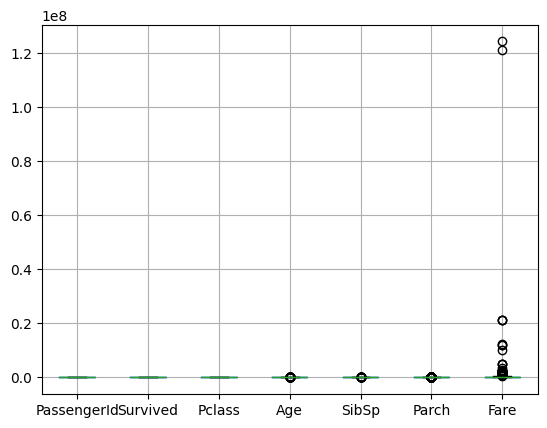

In [27]:
# Usaremos primeiro o boxplot como recurso

df4.boxplot()

In [28]:
fig, axs = plt.subplots(2,3,figsize=(20,10))

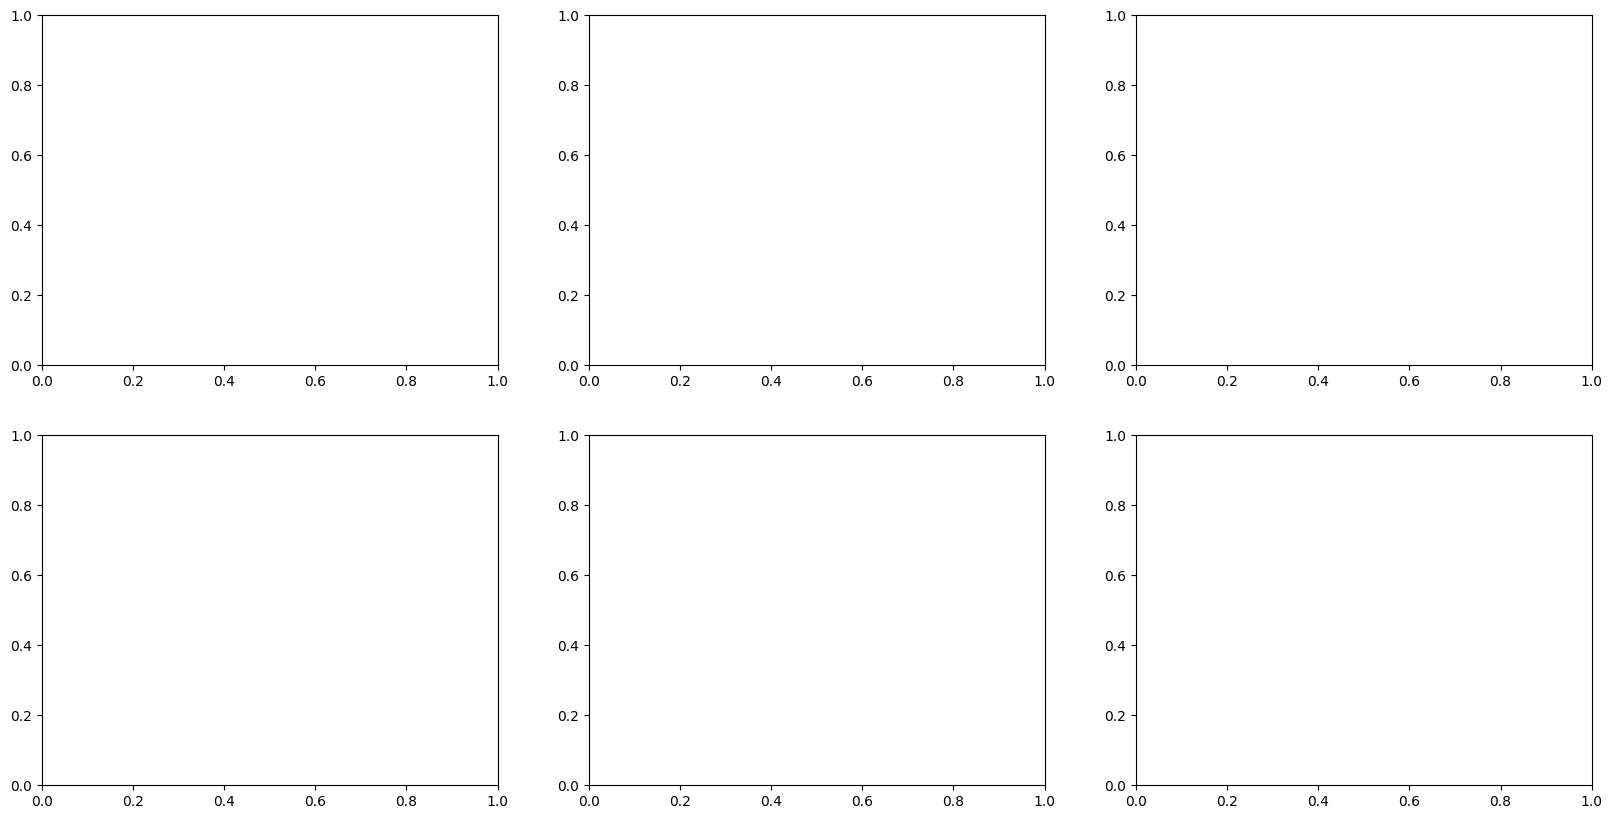

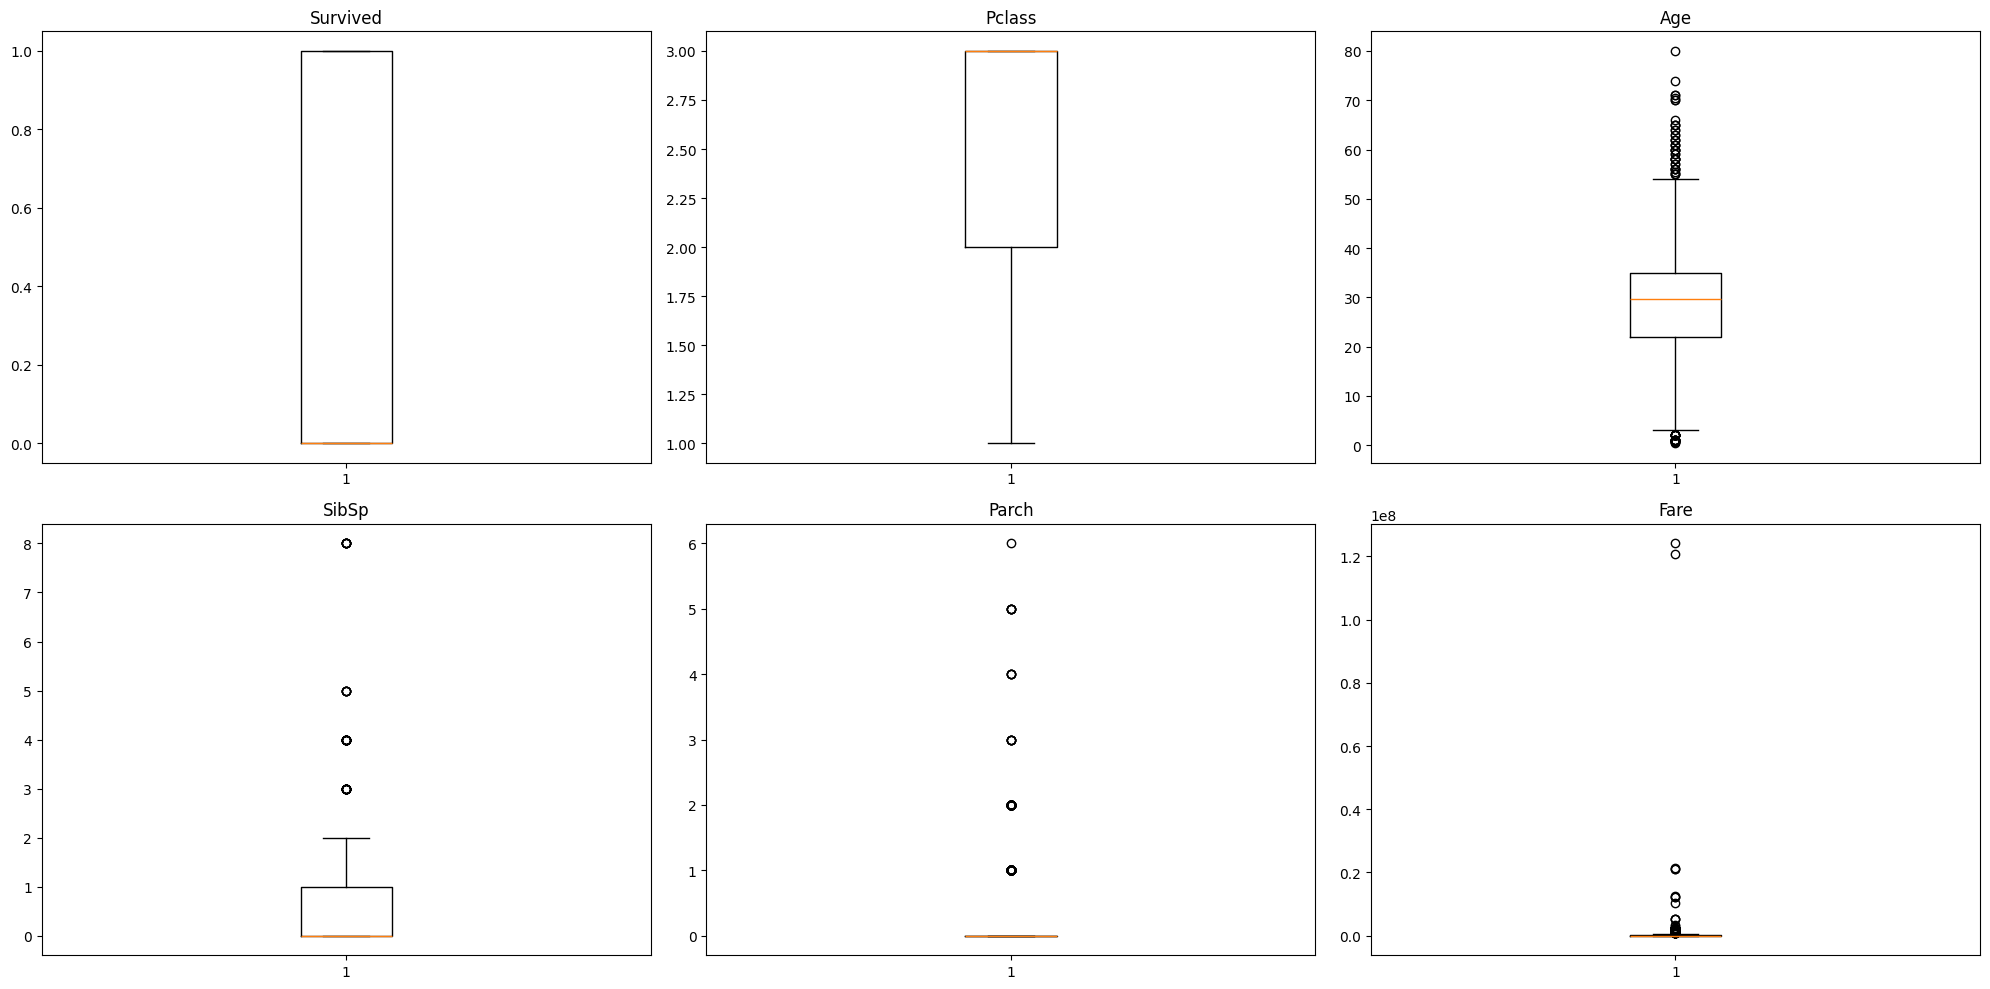

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Verificar e converter dados para numéricos
df4['Survived'] = pd.to_numeric(df4['Survived'], errors='coerce')
df4['Pclass'] = pd.to_numeric(df4['Pclass'], errors='coerce')
df4['Age'] = pd.to_numeric(df4['Age'], errors='coerce')
df4['SibSp'] = pd.to_numeric(df4['SibSp'], errors='coerce')
df4['Parch'] = pd.to_numeric(df4['Parch'], errors='coerce')
df4['Fare'] = pd.to_numeric(df4['Fare'], errors='coerce')

# Remover linhas com valores NaN que foram introduzidos pela conversão
df4 = df4.dropna(subset=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

# Criar subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Plotar boxplots
axs[0, 0].set_title('Survived')
axs[0, 0].boxplot(df4['Survived'].dropna())

axs[0, 1].set_title('Pclass')
axs[0, 1].boxplot(df4['Pclass'].dropna())

axs[0, 2].set_title('Age')
axs[0, 2].boxplot(df4['Age'].dropna())

axs[1, 0].set_title('SibSp')
axs[1, 0].boxplot(df4['SibSp'].dropna())

axs[1, 1].set_title('Parch')
axs[1, 1].boxplot(df4['Parch'].dropna())

axs[1, 2].set_title('Fare')
axs[1, 2].boxplot(df4['Fare'].dropna())

plt.tight_layout()
plt.show()


### Dependendo da Variável temos uma quantidade muito grande de outliers, por exemplo Parch, Age, Fare

### Vamos estudar estas 3 variáveis calculando qual a % de outliers

In [30]:
# Calculo dos Outliers

# Todos os pontos que estão fora do limite superior e inferior da amostra

# Limite superior = Q3 + 1,5 * DistanciaInterquartil
# Limite inferior = Q1 - 1,5 * DistanciaInterquartil

# Distância Interquartil = Valor do 3º Quartil - Valor do 1º Quartil (Q3 - Q1)


# Fazendo este cálculo para estas o Dataframe todo (apenas o quantitativo)

df4_quanti = df4[quanti]
colunas = df4_quanti.columns
outliers = []

for i in df4_quanti.columns:
    
    q3 = np.quantile(df4_quanti[i], 0.75)
    q1 = np.quantile(df4_quanti[i], 0.25)
    dist = q3 - q1 
    lim_inf = q1 - 1.5*dist
    lim_sup = q3 + 1.5*dist
    
    print('--------------')
    print(i)
    print(dist)
    print(lim_inf)
    print(lim_sup)
    print('-------------')

    outlier = 0

    for j in df4_quanti.index:
        if df4_quanti[i][j] < lim_inf:
            outlier = outlier + 1
        elif df4_quanti[i][j] > lim_sup:
            outlier= outlier + 1
        else: 
            pass
        
    outliers.append(outlier)
    
df_outlier = pd.DataFrame()
df_outlier['Variável'] = colunas
df_outlier['Outliers'] = outliers
df_outlier['Porcentagem'] = (outliers/df4_quanti.PassengerId.count()) * 100

--------------
PassengerId
444.0
-442.0
1334.0
-------------
--------------
Survived
1.0
-1.5
2.5
-------------
--------------
Pclass
1.0
0.5
4.5
-------------
--------------
Age
13.0
2.5
54.5
-------------
--------------
SibSp
1.0
-1.5
2.5
-------------
--------------
Parch
0.0
0.0
0.0
-------------
--------------
Fare
254640.45
-381934.12500000006
636627.675
-------------


In [31]:
df_outlier

,Variável,Outliers,Porcentagem
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Age,66,7.424072
4,SibSp,46,5.174353
5,Parch,213,23.959505
6,Fare,153,17.210349


### Nestes casos (Age e SibSp) a quantidade de outliers é pouco influente, poderíamos fazer um drop nestas linhas.

### No caso do Parch e Fare, teríamos que entender se são variáveis que importam muito para resolver o problema, para saber como tratar os outliers (de repente estudando eles separadamente, fazendo um modelo específico segmentando este público)

### Para este problema em especifico vamos manter os outliers apesar de estarem identificados

## 5 - Visualização de Dados

### Vamos tentar entender o que pode influenciar na taxa de sobrevivência da tripulação

In [32]:
# Quantas pessoas morreram e quantas sobreviveram

sns.countplot(x='Survived', data=df4);


In [33]:
# Quantas pessoas morreram e sobreviveram , separadas por sexo

df4.groupby(['Survived','Sex'])['Survived'].count()


Survived  Sex   
0         female     81
          male      468
1         female    231
          male      109
Name: Survived, dtype: int64

In [34]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df4);

### Aparentemente Mulheres tem uma melhor taxa de sobrevivência que homens


### ------------------------

### Verificando se a Classe que eles estavam viajando também influencia

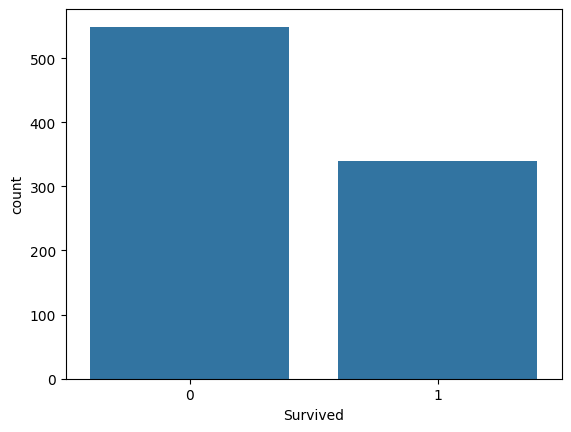

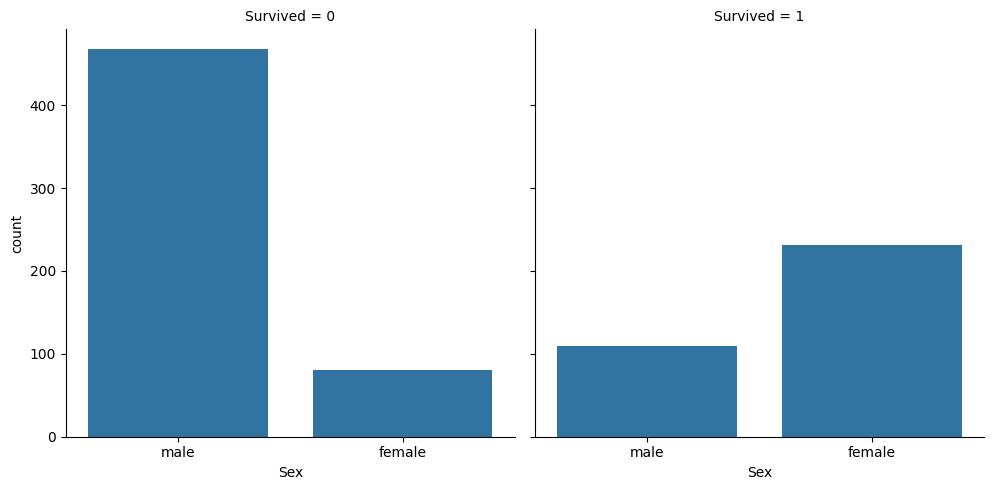

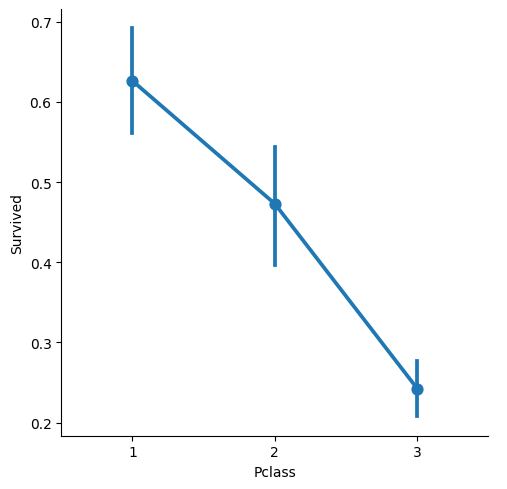

In [35]:

# Plotar um catplot
sns.catplot(x='Pclass', y='Survived', kind='point', data=df4)
# Exibir o plot
plt.show()


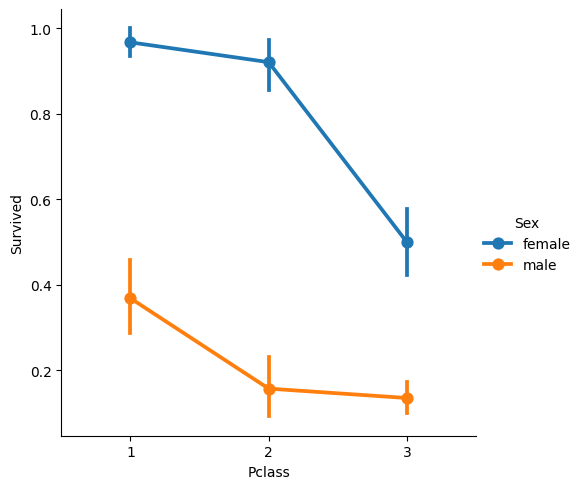

In [36]:
# Criar o catplot com argumentos nomeados
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=df4)

# Exibir o plot
plt.show()

### Aparentemente para homens e mulheres, quanto menor a classe que viajavam, mais provável de não sobreviver, no caso das mulheres essa diferença é ainda maior

### Para Embarked 

#### C = Cherbourg, Q = Queenstown, S = Southampton

In [37]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df4);


### Para Age 

In [38]:
sns.barplot(x='Survived', y='Age', data=df4);


### Correlação entre todas as variáveis

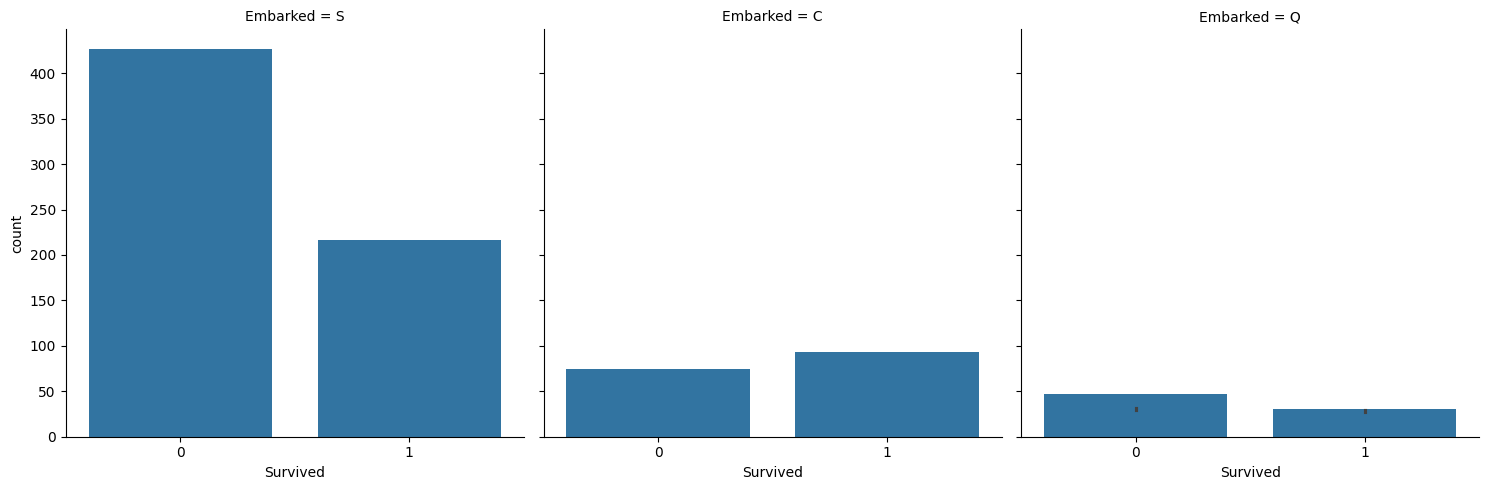

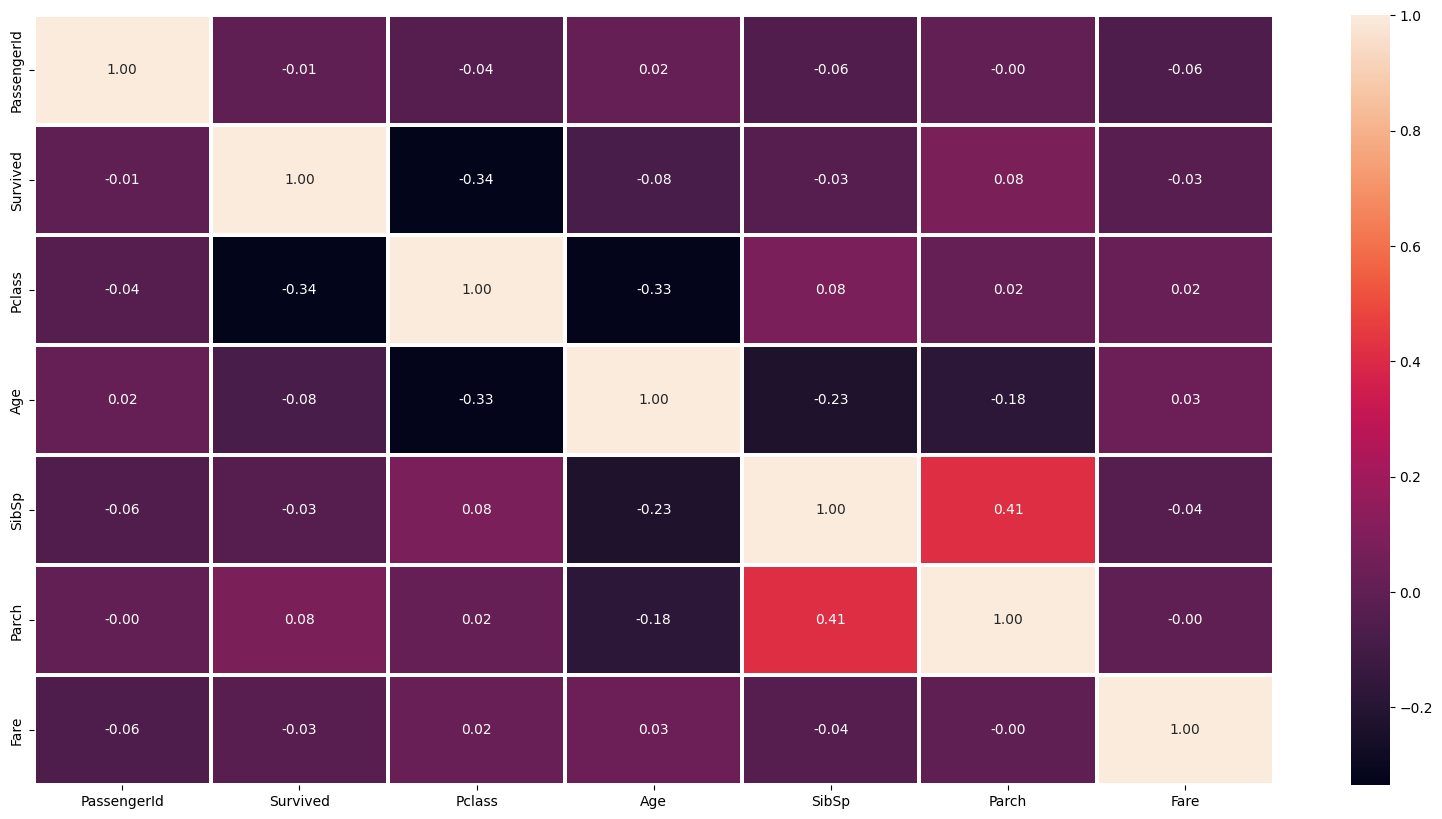

In [39]:


# Selecionar apenas colunas numéricas
df_numeric = df4.select_dtypes(include=['number'])

# Calcular a matriz de correlação
correlation_matrix = df_numeric.corr()

# Criar o heatmap
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, linewidths=1.5, fmt='.2f')

# Exibir o gráfico
plt.show()


# ------------------------------------

# Fim do Notebook